In [194]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
%matplotlib inline 

import holoviews as hv
hv.notebook_extension()

%output holomap='scrubber', max_frames = 10000

In [142]:
def find_av_theta(N, theta, positions, L, r):
    r_vec = positions[None, :] - positions[:, None]
    r_vec = r_vec - np.rint(r_vec / L) * L
    r_abs = np.linalg.norm(r_vec, axis=2)
    
    av_neigh_sin = np.array([np.mean(np.sin(theta[r_abs[i, :] < r])) for i in range(N)])
    av_neigh_cos = np.array([np.mean(np.cos(theta[r_abs[i, :] < r])) for i in range(N)])
    av_neigh_theta = np.arctan2(av_neigh_sin, av_neigh_cos)

    return av_neigh_theta

def simulate(N, steps, dt, L, v_abs, r, eta):
    #   System variables
    x = np.zeros(shape=(steps, N, 2))
    theta = np.zeros(shape=(steps, N))
    v = np.zeros(shape=(steps, N, 2))

    #   Initialize 
    x[0, :, :] = np.random.uniform(0, L, size=(N, 2))
    theta[0, :] = np.random.uniform(-np.pi, np.pi, size=N)
    v[0, :, 0] = v_abs * np.cos(theta[0, :])
    v[0, :, 1] = v_abs * np.sin(theta[0, :])  
    
    for i in range(steps-1):
        av_neighbour_theta = find_av_theta(N, theta[i, :], x[i, :], L, r)
        theta[i+1, :] = av_neighbour_theta + np.random.uniform(-eta/2, eta/2, size=N) 
        v[i+1, :, 0] = v_abs * np.cos(theta[i+1, :])
        v[i+1, :, 1] = v_abs * np.sin(theta[i+1, :])  
        x[i+1, :, :] = np.mod(x[i, :, :] + v[i, :, :] * dt, L)

    return x, v, theta

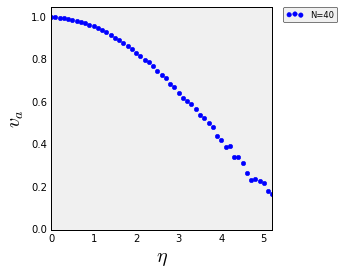

In [315]:
#   Calculate v_a vs eta for different number of particles at constant rho

#   TODO: MAKE THINGS INTO NP ARRAYS, MAKE ETA_STEP ETC

N_values = [40]
L_values = [3.1]
eta_values = np.arange(0, 6, eta_step)
v_a = {N:[] for N in N_values}

for N, L in zip(N_values, L_values):
    for eta in eta_values:
        v_abs = 0.3
        steps = 500
        dt = 0.1
        r = 1

        x, v, theta = simulate(N, steps, dt, L, v_abs, r, eta)

    #     for i in range(steps):
    #         if i%100 == 0:
    #             plt.quiver(x[i, :, 0], x[i, :, 1], v[i, :, 0], v[i, :, 1])
    #             plt.show()

        v_a[N].append(np.mean(np.linalg.norm(np.mean(v[int(steps/2):steps, :, :], axis=1), axis=1))/(v_abs))
        
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['b', 'c', 'y', 'm', 'r']

for index, N in enumerate(N_values):
    plt.scatter(eta_values, v_a[N], label="N="+str(N), color=colors[index])

ax.set_xlim([0, 5.2])
ax.set_ylim([0, 1.05])
ax.set_aspect(5)

plt.xlabel('$\\eta$', fontsize=20)
plt.ylabel('$v_a$', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

/home/andre/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 37


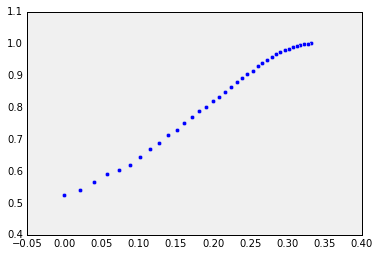

In [327]:
#    Finite size scaling
num_points = len(eta_values)
eta_step = 0.1

for N in N_values:
    abs_grad = np.abs(np.gradient(v_a[N], eta_step*np.ones(num_points)))
    max_grad_eta = eta_values[np.argmax(abs_grad)]
    x_points = np.log(max_grad_eta - eta_values)/max_grad_eta
    x_points = np.array(x_points)[x_points>0]
    y_points = np.array(v_a[N])[x_points>0]
    plt.scatter(x_points, y_points)
    
plt.show()


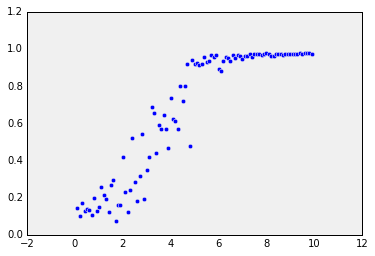

In [263]:
#   Calculate v_a for different values of rho 

rho_values = np.arange(0.1, 10, 0.1)
order_param = []

for rho in rho_values:
    N = 40
    L = N/rho
    eta = 0.7
    v_abs = 0.3
    steps = 200
    dt = 0.1
    r = 1

    x, v, theta = simulate(N, steps, dt, L, v_abs, r, eta)

    order_param.append(np.mean(np.linalg.norm(np.mean(v[int(steps/2):steps, :, :], axis=1), axis=1))/(v_abs))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(rho_values, order_param)
plt.show()